# JRA55-do RYF Analysis

This notebook outlines a preliminary comparison of the JRA RYF tests we have done using ACCESS-OM2.

In [1]:
%matplotlib inline

import cosima_cookbook as cc
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np

In [5]:
esub = ['1deg_jra55_ryf_spinup8',
 '1deg_jra55_ryf8485_spinup2',
 '025deg_jra55_ryf_spinup7']

HBox(children=(IntProgress(value=0, description='variables: ', max=1), HTML(value='')))

HBox(children=(IntProgress(value=0, description='experiments: ', max=3), HTML(value='')))

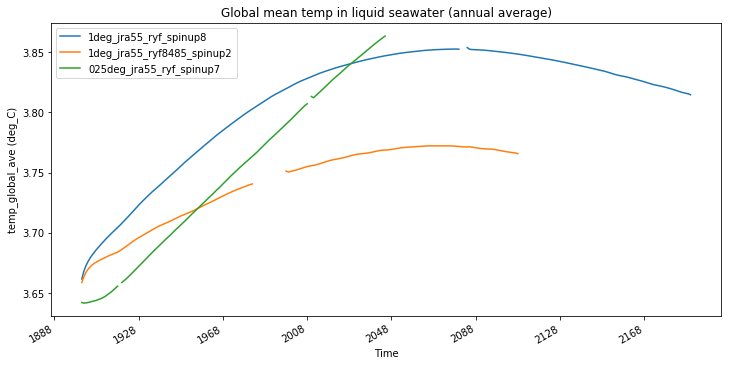

In [6]:
cc.plots.annual_scalar(esub, 'temp_global_ave')

HBox(children=(IntProgress(value=0, description='experiments: ', max=3), HTML(value='')))

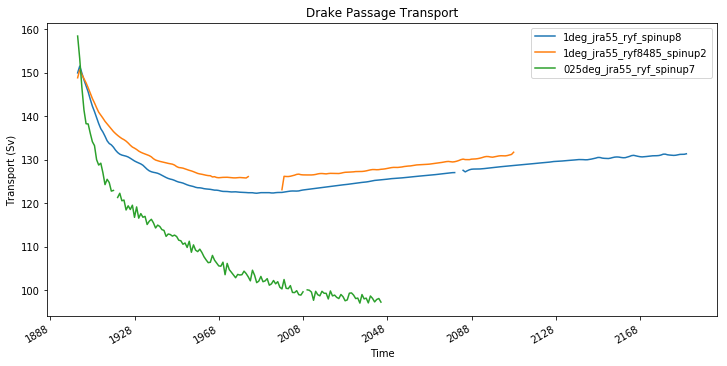

In [7]:
cc.plots.drake_passage(esub)

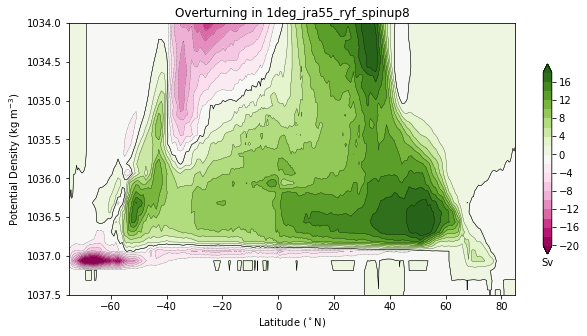

In [8]:
cc.plots.psi_avg(esub[0],10,GM=True)

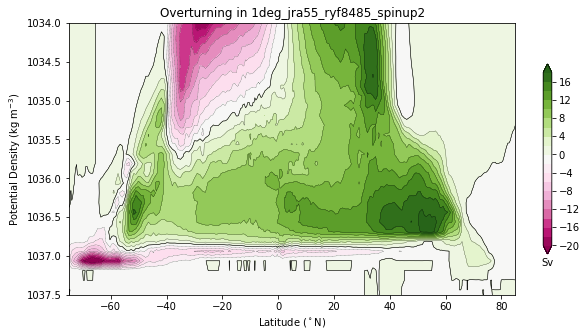

In [9]:
cc.plots.psi_avg(esub[1],10,GM=True)

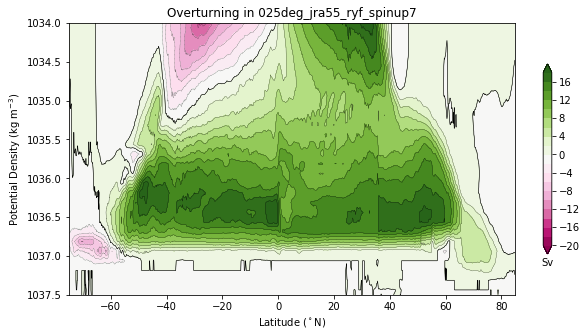

In [10]:
cc.plots.psi_avg(esub[2],10)

In [28]:
def calc_psi_time_aabw(expt,res): # TODO: cache these results?
    print('Calculating {} timeseries of transport '.format(expt))
    psi = cc.get_nc_variable(expt, 'ocean.nc', 'ty_trans_rho',
                          chunks={'potrho': None},
                          time_units = 'days since 1900-01-01')
    
    if psi.units == 'kg/s':
        print('WARNING: Changing units for ', expt)
        psi = psi*1.0e-9
    
    psi_sum = psi.sum('grid_xt_ocean').cumsum('potrho')
    
    if res == 1:
        jj=48
    else:
        jj = 230
        
    psi_aabw = psi_sum[:,60:,jj].min('potrho').resample('A',dim='time')
    psi_aabw = psi_aabw.compute()
    
    return psi_aabw

Calculating 1deg_jra55_ryf_spinup8 timeseries of transport 
Calculating 1deg_jra55_ryf8485_spinup2 timeseries of transport 
Calculating 025deg_jra55_ryf_spinup7 timeseries of transport 


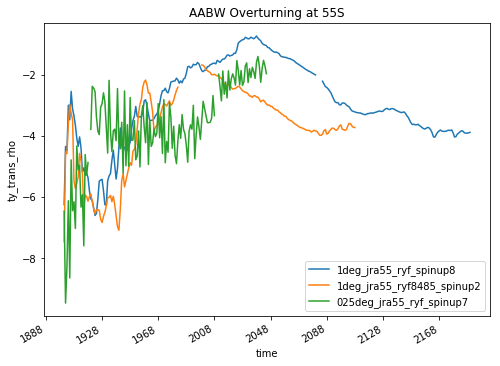

In [29]:
plt.figure(figsize=(8, 6)) 
psi_aabw = calc_psi_time_aabw(esub[0],1)
psi_aabw.plot()
psi_aabw = calc_psi_time_aabw(esub[1],1)
psi_aabw.plot()
psi_aabw = calc_psi_time_aabw(esub[2],0.25)
psi_aabw.plot()
    
plt.legend(esub)
plt.title('AABW Overturning at 55S')

In [26]:
def calc_psi_time_amoc(expt,res): # TODO: cache these results?
    print('Calculating {} timeseries of transport '.format(expt))
    psi = cc.get_nc_variable(expt, 'ocean.nc', 'ty_trans_rho',
                          chunks={'potrho': None},
                          time_units = 'days since 1900-01-01')
    
    if psi.units == 'kg/s':
        print('WARNING: Changing units for ', expt)
        psi = psi*1.0e-9
    
    psi_sum = psi.sum('grid_xt_ocean').cumsum('potrho')
    
    if res == 1:
        jj=193
    else:
        jj = 605
    
    psi_amoc = psi_sum[:,60:,jj].max('potrho').resample('A',dim='time')
    psi_amoc = psi_amoc.compute()
    
    return psi_amoc

Calculating 1deg_jra55_ryf_spinup8 timeseries of transport 
Calculating 1deg_jra55_ryf8485_spinup2 timeseries of transport 
Calculating 025deg_jra55_ryf_spinup7 timeseries of transport 


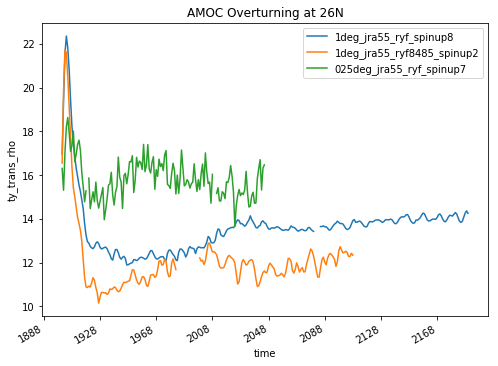

In [27]:
plt.figure(figsize=(8, 6)) 
psi_amoc = calc_psi_time_amoc(esub[0],1)
psi_amoc.plot()
psi_amoc = calc_psi_time_amoc(esub[1],1)
psi_amoc.plot()
psi_amoc = calc_psi_time_amoc(esub[2],0.25)
psi_amoc.plot()
    
plt.legend(esub)
plt.title('AMOC Overturning at 26N')

/g/data3/hh5/public/apps/miniconda3/envs/analysis3/lib/python3.6/site-packages/dask/array/numpy_compat.py:45: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


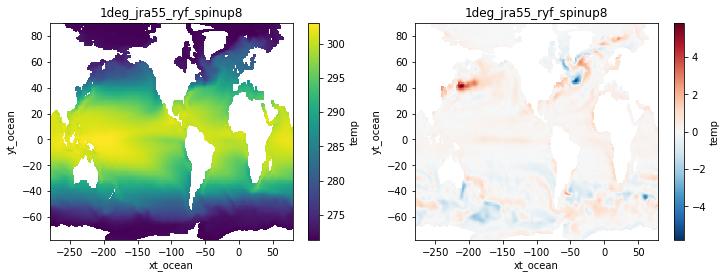

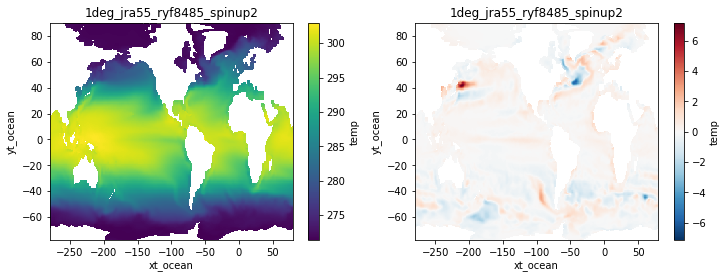

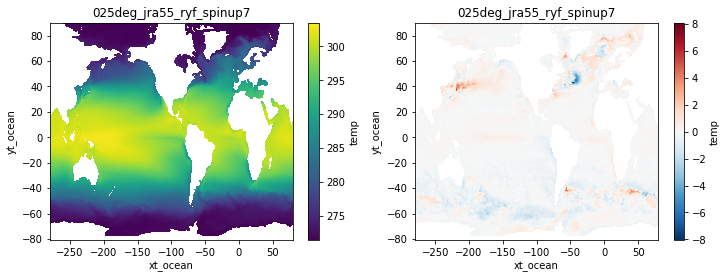

In [12]:
cc.plots.sea_surface_temperature(esub)

/g/data3/hh5/public/apps/miniconda3/envs/analysis3/lib/python3.6/site-packages/dask/array/numpy_compat.py:45: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


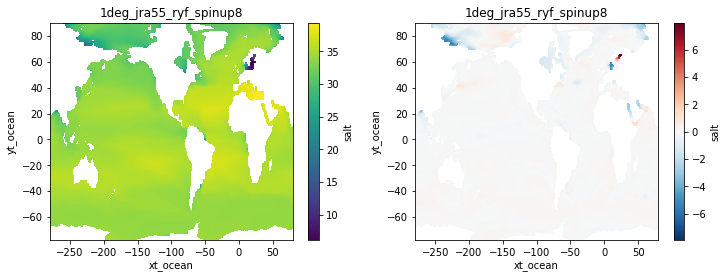

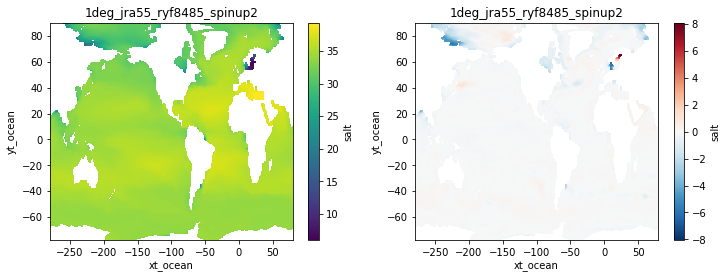

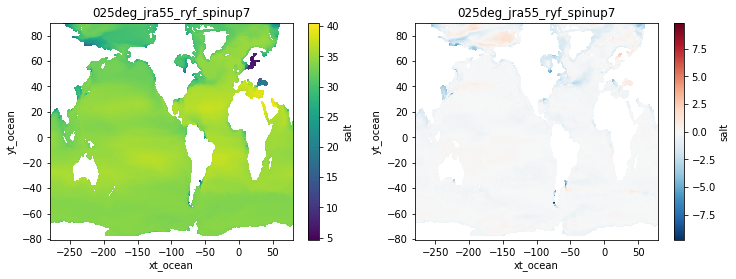

In [13]:
cc.plots.sea_surface_salinity(esub)

/g/data3/hh5/public/apps/miniconda3/envs/analysis3/lib/python3.6/site-packages/dask/array/numpy_compat.py:45: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


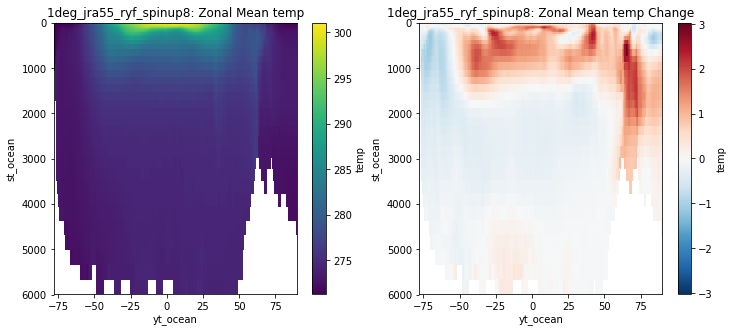

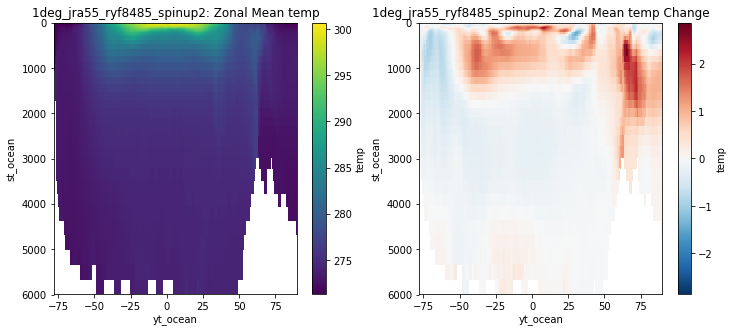

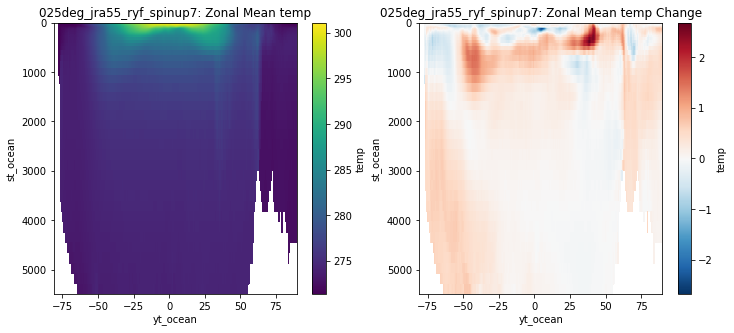

In [14]:
cc.plots.zonal_mean(esub,'temp',n=10)

/g/data3/hh5/public/apps/miniconda3/envs/analysis3/lib/python3.6/site-packages/dask/array/numpy_compat.py:45: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


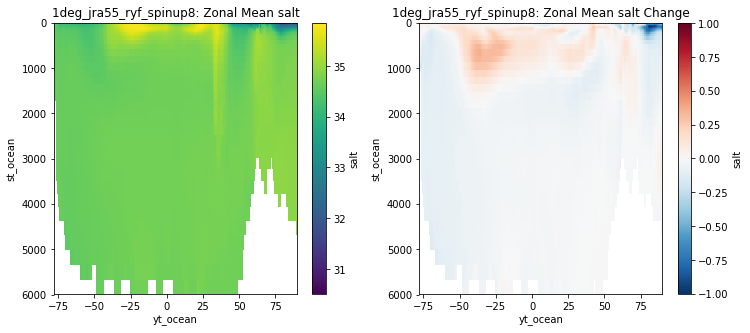

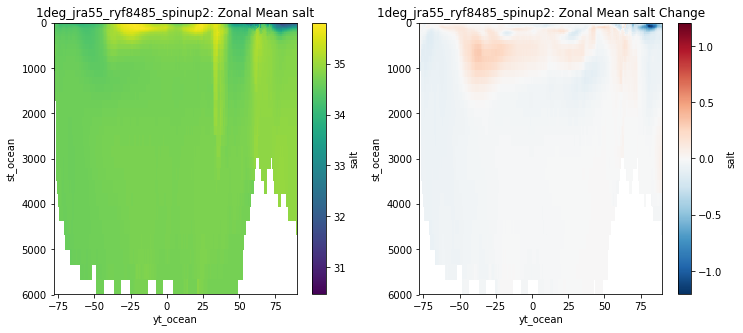

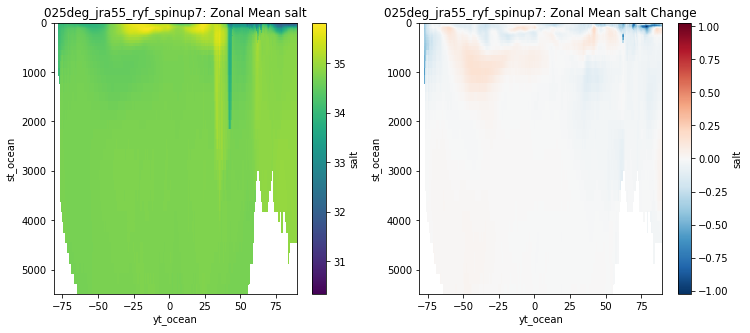

In [15]:
cc.plots.zonal_mean(esub,'salt',n=10)